In [18]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc30/BHOSS_CODE"
data = "Rhigh_5_incl_30_IMAGE_GRMHD_HAMR3D_SANEA93M_151.dat"
#datadir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc50/BHOSS_CODE"
#data = "Rhigh_10_incl_50_IMAGE_GRMHD_HAMR3D_MADA05_112.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=3)  # Koushik's data - only 230GHz

width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 1
time: 10115.820650 Rg/c, inclination: 30.000000 deg, phi: 0.000000 deg, BH spin: -0.937500
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: 230.0
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
intensity (min,max)= 5.39194e-16 0.0013801
Total flux = 2.046960 Jy at 1 GHz


In [9]:
print(bhdata.inclination, bhdata.phi, bhdata.spin)

10.0 0.0 -0.9375


In [101]:
print(bhdata.totFlux)

1.3661460107794135e-10


width: 16.107000 Rg, offset: 0.000000 Rg, resolution: 320, Number of obs. freqs: 1
time: 9008.689295 Rg/c, inclination: 50.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.761953e+22, Jansky correction: 6.025783e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: 230.0
307200
-81.01246801847637 81.01246801847637 -81.01246801847637 81.01246801847637
(zmin,zmax)= 2.44258e-13 0.000462947
Total flux = 1.998977 Jy at 1 GHz
0:00:23.190 - Start Program


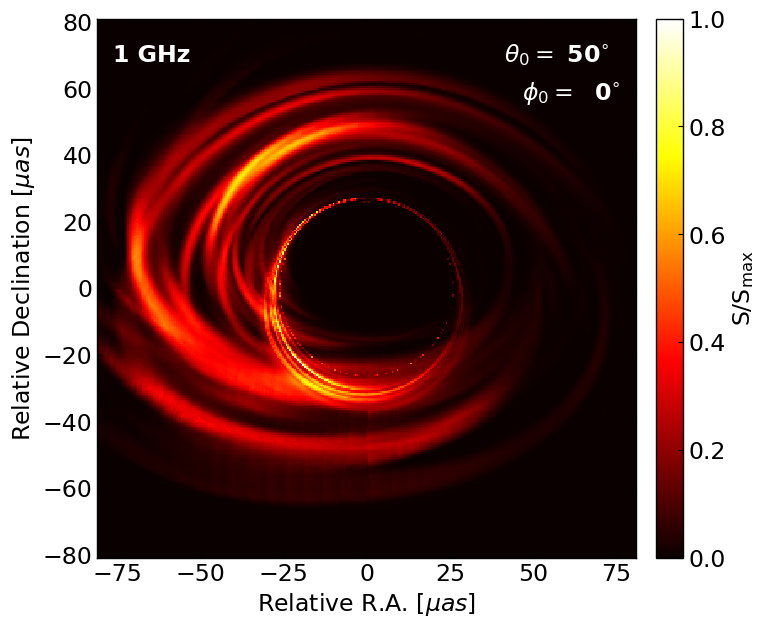

In [9]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'
datadir = "/ccs/home/astrodoo/MEMW/bhoss_code"
data = "Rhigh_1_incl_50_IMAGE_GRMHD_HAMR3D_SANEA0_640.dat"


filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=3,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [19]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,inclination,model_name):

    if (model_name is"MADA05"):
        model_str = "bhoss_MA05"
        ind_start = 100
        ind_end = 299
    elif (model_name is "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name is "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    #if(model_name=='SANEA0'):
    #    os.chdir("/gpfs/alpine/phy129/scratch/astrodoo/bhoss_code/BHOSS_CODE")
    #    ind_start=640
    #    ind_end  =642
    #elif(model_name=='SANEA05'):
    #    os.chdir("/gpfs/alpine/phy129/scratch/kchatterj/EHT_images/SA05/SA05_Rh%d/BHOSS_CODE"%(Rhigh))
    #    ind_start=789
    #    ind_end  =889
    #elif(model_name=='MADA05'):
    #    os.chdir("/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc50/BHOSS_CODE")
    #    ind_start=100
    #    ind_end  =299
    #else:
    #    print("no model")
    #    return  
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rhigh_%d_incl_%d_IMAGE_GRMHD_HAMR3D_%s_%d.dat"%(Rhigh,inclination,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 3))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [20]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(5, 10, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc10/BHOSS_CODE
132, flux: 1.892697 at 9925.528924
133, flux: 1.895660 at 9934.173457
134, flux: 1.892994 at 9942.822006
135, flux: 1.851067 at 9955.791871
136, flux: 1.833025 at 9964.438576
137, flux: 1.804200 at 9973.082137
138, flux: 1.811466 at 9986.049828
139, flux: 1.810155 at 9994.698523
140, flux: 1.819474 at 10003.343218
141, flux: 1.859651 at 10016.310270
142, flux: 1.923757 at 10024.962133
143, flux: 1.903194 at 10033.615429
144, flux: 1.856376 at 10046.591838
145, flux: 1.852686 at 10055.242073
146, flux: 1.821782 at 10063.900253
147, flux: 1.821234 at 10076.889057
148, flux: 1.830597 at 10085.542268
149, flux: 1.864235 at 10094.188939
150, flux: 1.877260 at 10102.838018
151, flux: 1.900999 at 10115.820650
152, flux: 1.945065 at 10124.473785
153, flux: 2.001464 at 10133.126518
154, flux: 2.034498 at 10146.100336
155, flux: 2.023325 at 10154.746542
156, flux: 1.995894 at 10163.398930
157, flux: 2.

In [21]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [22]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 1.948940 Jy, the density scale = 2.750000e-14


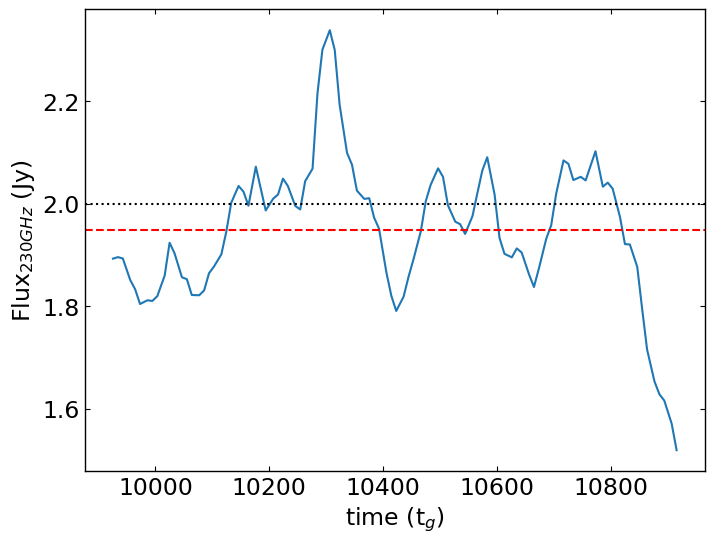

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [24]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

132:: 1.892697 Jy at 9925.528924
133:: 1.895660 Jy at 9934.173457
134:: 1.892994 Jy at 9942.822006
135:: 1.851067 Jy at 9955.791871
136:: 1.833025 Jy at 9964.438576
137:: 1.804200 Jy at 9973.082137
138:: 1.811466 Jy at 9986.049828
139:: 1.810155 Jy at 9994.698523
140:: 1.819474 Jy at 10003.343218
141:: 1.859651 Jy at 10016.310270
142:: 1.923757 Jy at 10024.962133
143:: 1.903194 Jy at 10033.615429
144:: 1.856376 Jy at 10046.591838
145:: 1.852686 Jy at 10055.242073
146:: 1.821782 Jy at 10063.900253
147:: 1.821234 Jy at 10076.889057
148:: 1.830597 Jy at 10085.542268
149:: 1.864235 Jy at 10094.188939
150:: 1.877260 Jy at 10102.838018
151:: 1.900999 Jy at 10115.820650
152:: 1.945065 Jy at 10124.473785
153:: 2.001464 Jy at 10133.126518
154:: 2.034498 Jy at 10146.100336
155:: 2.023325 Jy at 10154.746542
156:: 1.995894 Jy at 10163.398930
157:: 2.072135 Jy at 10176.385271
158:: 2.029302 Jy at 10185.047716
159:: 1.986752 Jy at 10193.708846
160:: 2.009405 Jy at 10206.700720
161:: 2.017822 Jy at 1

In [25]:
#Rhigh=1,5,10,20,40,80,160
#inclination=10,30,50,60,70,90,110,130,150,170
#Average flux=2 Jy
#(Rhigh, inclination, model_name)
#bhoss_avg(1  ,50,"SANEA0") 
#bhoss_avg(5  ,50,"SANEA0") 
#bhoss_avg(10 ,50,"SANEA0") 
#bhoss_avg(20 ,50,"SANEA0") 
#bhoss_avg(40 ,50,"SANEA0") 
#bhoss_avg(80 ,50,"SANEA0") 
#bhoss_avg(160,50,"SANEA0") 

#ind,time,z_tot,dscale = bhoss_avg(1, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(1, 90, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 70, "MADA05")
#ind,time,z_tot,dscale = bhoss_avg(5, 50, "MADA05")

ind,time,z_tot,dscale = bhoss_avg(5, 30, "SANEA93M")

work directory /gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc30/BHOSS_CODE
132, flux: 1.907283 at 9925.528924
133, flux: 1.904270 at 9934.173457
134, flux: 1.902634 at 9942.822006
135, flux: 1.877450 at 9955.791871
136, flux: 1.873815 at 9964.438576
137, flux: 1.861680 at 9973.082137
138, flux: 1.869865 at 9986.049828
139, flux: 1.879127 at 9994.698523
140, flux: 1.893982 at 10003.343218
141, flux: 1.923352 at 10016.310270
142, flux: 1.971489 at 10024.962133
143, flux: 1.952560 at 10033.615429
144, flux: 1.933910 at 10046.591838
145, flux: 1.930732 at 10055.242073
146, flux: 1.916768 at 10063.900253
147, flux: 1.890842 at 10076.889057
148, flux: 1.912826 at 10085.542268
149, flux: 1.949314 at 10094.188939
150, flux: 1.976708 at 10102.838018
151, flux: 2.046960 at 10115.820650
152, flux: 2.109256 at 10124.473785
153, flux: 2.194407 at 10133.126518
154, flux: 2.248435 at 10146.100336
155, flux: 2.260107 at 10154.746542
156, flux: 2.236427 at 10163.398930
157, flux: 2.

In [26]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [27]:
import numpy as np
import os

outdir = "/gpfs/alpine/phy129/scratch/astrodoo/BHOSS_EHT/bhoss_SA93M/Rh5/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 132/231/100
average z_tot = 2.040413 Jy, the density scale = 2.750000e-14


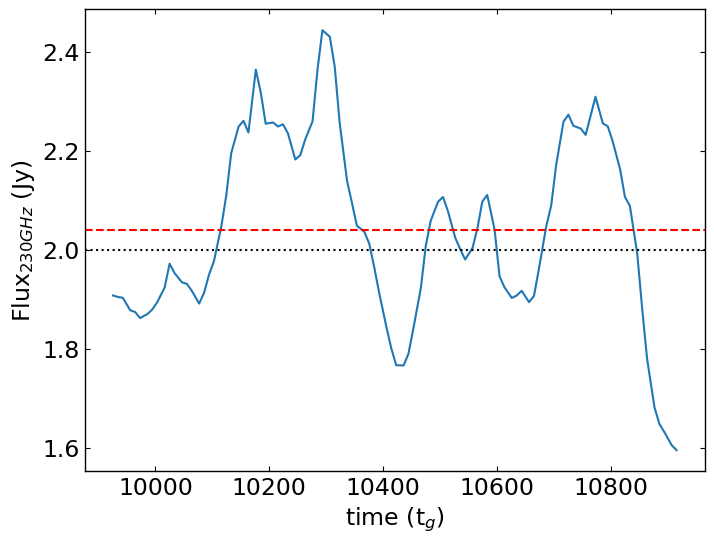

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [17]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

132:: 1.774081 Jy at 9925.528924
133:: 1.771349 Jy at 9934.173457
134:: 1.769453 Jy at 9942.822006
135:: 1.745373 Jy at 9955.791871
136:: 1.742190 Jy at 9964.438576
137:: 1.731610 Jy at 9973.082137
138:: 1.739942 Jy at 9986.049828
139:: 1.748988 Jy at 9994.698523
140:: 1.763662 Jy at 10003.343218
141:: 1.792551 Jy at 10016.310270
142:: 1.838336 Jy at 10024.962133
143:: 1.820250 Jy at 10033.615429
144:: 1.802320 Jy at 10046.591838
145:: 1.798863 Jy at 10055.242073
146:: 1.785412 Jy at 10063.900253
147:: 1.760913 Jy at 10076.889057
148:: 1.781753 Jy at 10085.542268
149:: 1.816040 Jy at 10094.188939
150:: 1.841978 Jy at 10102.838018
151:: 1.908073 Jy at 10115.820650
152:: 1.966866 Jy at 10124.473785
153:: 2.047645 Jy at 10133.126518
154:: 2.100979 Jy at 10146.100336
155:: 2.113154 Jy at 10154.746542
156:: 2.090698 Jy at 10163.398930
157:: 2.210550 Jy at 10176.385271
158:: 2.166556 Jy at 10185.047716
159:: 2.107879 Jy at 10193.708846
160:: 2.111966 Jy at 10206.700720
161:: 2.104381 Jy at 1